In [1]:
import os
# def get_base_path():
#   return "/content/drive/MyDrive/EL2850/EL2850-hw1-3/"

# if not os.path.exists("/content/drive/MyDrive"):
#   try:
#     from google.colab import drive
#     if not os.path.exists("/content/drive"):
#       drive.mount("/content/drive")
#   except Exception as e:
#     print(e)

import scipy.io


In [2]:
import numpy as np

from scipy import stats
from matplotlib import pyplot as plt

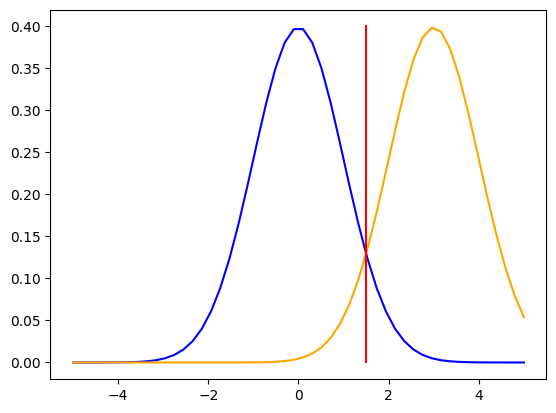

In [3]:
#1

#V
x=np.linspace(-5,5)
plt.plot(x,scipy.stats.norm().pdf(x),color='blue')
plt.plot( x,  scipy.stats.norm(3,1).pdf(x),color='orange')
plt.plot([1.5,1.5],[0,0.4],color='red')

plt.show()

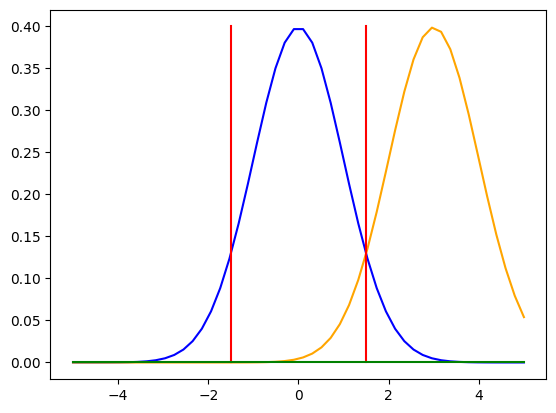

In [4]:
x=np.linspace(-5,5)
plt.plot(x,scipy.stats.norm().pdf(x),color='blue')
plt.plot( x,  scipy.stats.norm(3,1).pdf(x),color='orange')
plt.plot([1.5,1.5],[0,0.4],color='red')
plt.plot([-1.5,-1.5],[0,0.4],color='red')

plt.plot([-5,5],[0,0],color="green")
plt.show()

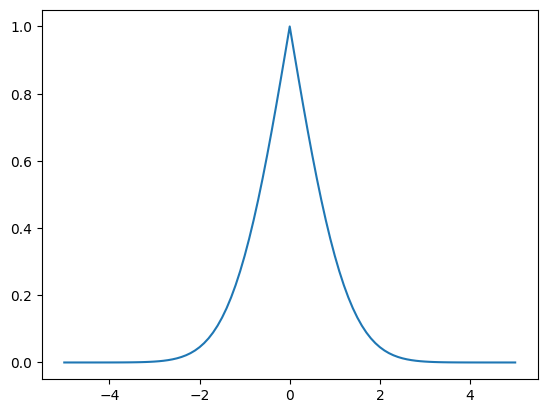

In [5]:





x1c = np.linspace(-5,5,101) # odd number to make it "pointy"

plt.plot(x1c,(scipy.stats.norm().cdf( - abs(x1c))*2.0))

plt.show()

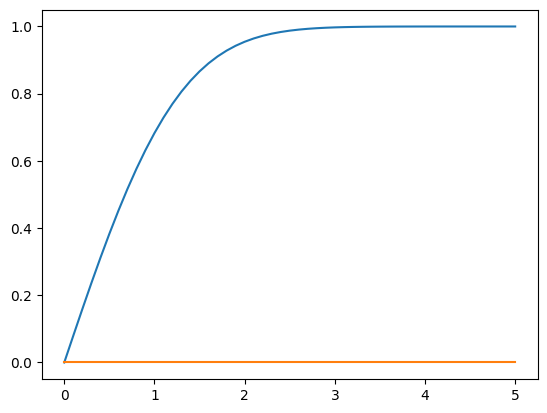

In [16]:
plt.plot(x1c[50:],
         abs(-1 + 2*scipy.stats.norm().cdf((x1c)))[50:])
plt.plot([0,5],[0,0])
plt.show()

In [7]:
data = scipy.io.loadmat(  'residualdata.mat')

In [8]:

r=np.array(data['r'][0])

In [9]:
def estimate_csum_params(r):
  mu=np.mean(r)
  sigma=np.std(r)
  h=mu
  k=0.5
  return h,k





In [10]:
plt.plot(np.linspace(0,len(r),num=len(r)),r,np.linspace(0,len(r),num=len(r)),[mu]*len(r) )
plt.show()

NameError: name 'mu' is not defined

In [ ]:
h,k=estimate_csum_params(r)
k=0.5
k=0
n=len(r)
C=np.zeros(n)
for t in range(n):
  if t>0:
    tmp= C[t-1] + r[t]-h-k
  else:
    tmp = r[t]-h-k
  # it was 0 before (np.zeros), so it ends up being max(0,tmp)
  if tmp > 0:
    C_t=tmp
    C[t]=C_t


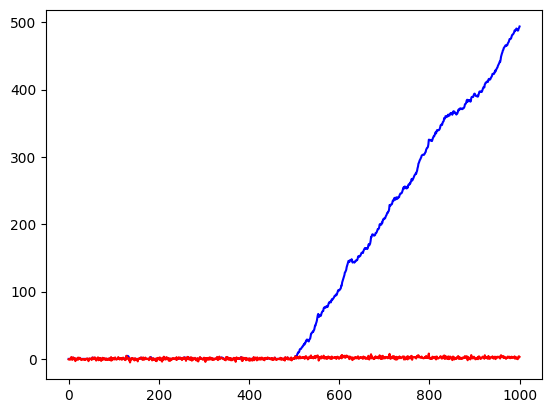

In [ ]:
plt.plot( np.linspace(0,n,n),C,color="blue")
plt.plot(np.linspace(0,n,n),r,color="red")
plt.show()